# Computing prob.

In [1]:
import numpy.random as rnd
import numpy as np

In [2]:
count=0
n=200000

for i in range(n):
  x=rnd.randint(1,6+1)
  y=rnd.triangular(1,2,6)

  if 2*x +y <= 10:
    count=count+1

print('Prob(2X+Y <= 10)=',count/n)

Prob(2X+Y <= 10)= 0.499835


# SimDynamicModels

**Real Non-Linear Simple Pendulum**

In [3]:
import math 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

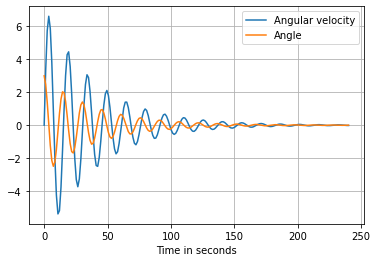

In [4]:
# inputs
g = 9.81
L = 1
b = 0.05
m = 1

# initial conditions in the form of vector
Var0 = [0,3]   # (v, theta)

# define the model
def HM(Var, t, g, L, b, m):
  v=Var[1]                         
  theta=Var[0]
  # enter the diff eqns:
  dTheta_dt = v
  dv_dt = -((b/m)*dTheta_dt) -(g*np.sin(2*np.pi*theta/360)/L)
  return dTheta_dt, dv_dt

# timespace
t = np.linspace(0,240,200)  

# simulate  
Var = odeint(HM,Var0,t,args=(g,L,b,m))

# plot the results
plt.plot(t, Var[:,0], label='Angular velocity')
plt.plot(t, Var[:,1], label='Angle')
plt.legend()
plt.xlabel('Time in seconds')
plt.grid()

**SIR EPIDEMIC MODEL(WITH LOSS OF IMMUNITY)**

Maximum number of infected people within this timespan:  416.1092942823787


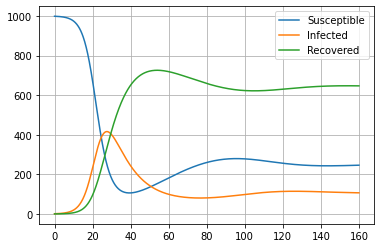

In [5]:
# inputs
N=1000 # total popln
beta, gamma, k = 0.4, 0.1, 60

# initial condition (Susceptible, Infected, Recovered)
I0,R0 = 1,0
S0 = N - I0 - R0
#the initial conditions as a vector
y0 = S0, I0, R0

# define the model
def SIRmodel_modified(y, t, N, beta, gamma, k):
  S,I,R=y
  dS_dt=(R/k)-(beta*S*I/N)
  dI_dt=(beta*S*I/N) - (gamma*I)
  dR_dt=(gamma*I) - (R/k)
  return dS_dt,dI_dt,dR_dt

#timepoints
t = np.linspace(0,160,1000)

#simulate
eqn=odeint(SIRmodel_modified, y0, t, args=(N,beta,gamma,k))

S,I,R=eqn.T   #transpose to get the corresponding arrays

#plot the results
plt.plot(t,S,label='Susceptible')
plt.plot(t,I,label='Infected')
plt.plot(t,R,label='Recovered')
plt.legend()
plt.xlabel=('Days')
plt.grid()
print('Maximum number of infected people within this timespan: ', np.max(I))

# SimOptClass

In [6]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import random

In [7]:
# For Goldstein function
def Goldstein(x1, x2):
  z= (1 + (19 - 14*x1 + 3*x1**2 - 14*x2 + 6*x1*x2 + 3*x2**2)*((x1+x2+1)**2))*(30 + (18 - 32*x1 + 12*x1**2 + 48*x2 - 36*x1*x2 + 27*x2**2)*((2*x1 - 3*x2)**2))
  return z

N = 300000     # total number of points to be sampled
D = 2          #dimension
lb = -2
ub = 2 

X1=[rnd.uniform(lb,ub) for i in range(N)]
X2=[rnd.uniform(lb,ub) for i in range(N)]
Y=[Goldstein(X1[i],X2[i]) for i in range(N)]

#display results
print('Monte Carlo Simulation Optimization: ')
print('Best Decision Variables: ', X1[np.argmin(Y)],X2[np.argmin(Y)])
print('The best objective: ', min(Y))

X_optimum = [0,-1]   #already known 
print('\nKnown optimal decision variables:', X_optimum)
print('Optimal objective value: ', Goldstein(X_optimum[0],X_optimum[1]))

Monte Carlo Simulation Optimization: 
Best Decision Variables:  -9.378943663351791e-05 -0.9983660971126582
The best objective:  3.001185826923073

Known optimal decision variables: [0, -1]
Optimal objective value:  3


In [9]:
# HIMMELBLAU FUNCTION
def Himmelblau(x1, x2):
  return (x1**2 + x2 - 11)**2 + (x1 + x2**2 - 7)**2

R = 20       #replication number
N = 200000   #number of points to be evaluated each time
D = 2        #dimension
lb = -5
ub = 5
Dec_Var = []
obj = []
for k in range(R):
      X1 = [rnd.uniform(lb,ub) for i in range(N)]
      X2 = [rnd.uniform(lb,ub) for i in range(N)]
      Y = [Himmelblau(X1[i],X2[i]) for i in range(N)]

      #display the results:
      Dec_Var.append([round(X1[np.argmin(Y)],3),round(X2[np.argmin(Y)],3)])
      obj.append(min(Y))
for k in range(R):
  print(str(k+1)+') Value of Decision Variables: ',Dec_Var[k],'AND  Objective Value: ',round(obj[k],4),)   
print()

#known solutions are:
soln = [[3.0,2.0],[-2.805118,3.131312],[-3.77931,-3.28318],[3.584428,-1.848126]]
eps = 0.05
count = [0 for i in range(4)]

# counting number of solutions close to each of the known solutions
for k in range(R):
  for i in range(4):
    if Dec_Var[k][0] >= soln[i][0] - eps and Dec_Var[k][0] <= soln[i][0] + eps and Dec_Var[k][1] >= soln[i][1] - eps and Dec_Var[k][1] <= soln[i][1] + eps :
      count[i] = count[i] + 1

for i in range(4):
  print('Number of Solutions close to ',soln[i],' is: ', count[i])

1) Value of Decision Variables:  [-2.81, 3.131] AND  Objective Value:  0.0007
2) Value of Decision Variables:  [-3.775, -3.279] AND  Objective Value:  0.0014
3) Value of Decision Variables:  [2.998, 1.996] AND  Objective Value:  0.0006
4) Value of Decision Variables:  [3.005, 2.007] AND  Objective Value:  0.0023
5) Value of Decision Variables:  [3.583, -1.851] AND  Objective Value:  0.0003
6) Value of Decision Variables:  [-2.8, 3.134] AND  Objective Value:  0.0011
7) Value of Decision Variables:  [3.0, 2.004] AND  Objective Value:  0.0003
8) Value of Decision Variables:  [-3.782, -3.284] AND  Objective Value:  0.0006
9) Value of Decision Variables:  [2.998, 1.994] AND  Objective Value:  0.0009
10) Value of Decision Variables:  [3.583, -1.836] AND  Objective Value:  0.002
11) Value of Decision Variables:  [2.999, 2.009] AND  Objective Value:  0.0011
12) Value of Decision Variables:  [-2.809, 3.138] AND  Objective Value:  0.002
13) Value of Decision Variables:  [3.0, 2.006] AND  Objecti